In [1]:
import time

In [2]:
import matplotlib.pyplot as plt

[]

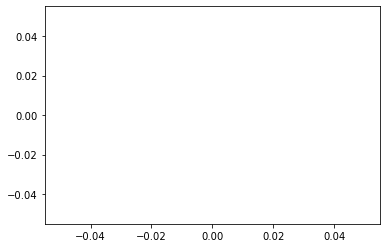

In [3]:
# workaround plot otherwise setting the font does not work :(
plt.plot()

In [4]:
# Code that should make matplotlib use ACM font (libertine)
import matplotlib

rc_fonts = {
    "font.family": "serif",
    "font.size": 12,
    'figure.figsize': (5, 3),
    "text.usetex": True,
    'text.latex.preamble': 
        r"""
        \usepackage{libertine}
        \usepackage[libertine]{newtxmath}
        """,
}
matplotlib.rcParams.update(rc_fonts)

In [5]:
import pickle

import numpy as np

In [6]:
#save_prefix = datetime.now().strftime("%Y_%m_%d__%H_%M_%S")
#print(to_komma(save_prefix))
#with open(f"./results/Baselines_{save_prefix}.pkl", "wb") as f:
#    pass
#    pickle.dump((dataset, SAEs0, Js0, times0), f)

In [7]:
from datetime import datetime

In [8]:
karate_NeSt = "2022_09_28__16_29_55"
karate_ERGM = "2022_09_28__16_29_54"
karate_ERGM2 = "2022_10_10__12_13_31"

In [9]:
phonecalls_ERGM =  "2022_09_27__13_07_02"
phonecalls_ERGM2 = "2022_10_04__05_39_34"

phonecalls_NeSt =  "2022_09_28__16_27_13"
phonecalls_NeSt2 = "2022_09_28__17_00_54"
phonecalls_NeSt3 = "2022_10_04__05_39_43"

In [10]:
def load_data(kind, dataset, timestamp):
    with open(f"./results/{kind}_{dataset}_{timestamp}.pkl", "rb") as f:
        (dataset, n_samples, n_rewires, SAE, J, ratio, rew_time) = pickle.load(f)
    return (dataset, n_samples, n_rewires, SAE, J, ratio, rew_time)

In [11]:
_, _, _, SAE1, J1, ratio1, rew_time1 = load_data("ERGM", "phonecalls", phonecalls_ERGM2)

In [12]:
_, _, _, SAE3, J3, ratio3, rew_time3 = load_data("ERGM", "karate", karate_ERGM2)

In [13]:
_, _, _, SAE2, J2, ratio2, rew_time2 = load_data("NeSt", "phonecalls", phonecalls_NeSt3)

In [14]:
_, _, _, SAE4, J4, ratio4, rew_time4 = load_data("NeSt", "karate", karate_NeSt)


In [15]:
_, _, _, SAE5, J5, ratio5, rew_time5 = load_data("Erdos", "karate", "2022_10_10__15_35_40")
_, _, _, SAE6, J6, ratio6, rew_time6 = load_data("Erdos", "phonecalls", "2022_10_10__15_36_55")

In [16]:
def drop_keys(dicts, keys):
    for key in keys:
        for d in dicts:
            if key in d:
                del d[key]

In [17]:
drop_keys((SAE1, J1, ratio1, rew_time1), [50,200,400,600,800])
drop_keys((SAE2, J2, ratio2, rew_time2), [5,6,7,8])

In [18]:
drop_keys((SAE3, J3, ratio3, rew_time3), [50,200,600,800])

In [19]:
list(SAE4.keys())

[0, 1, 2]

In [20]:
keys1 = ["ERGM-"+str(key//10) for key in SAE1.keys()]
keys2 = ["NeSt-"+str(key+1) for key in SAE2.keys()]

for i, val in enumerate(keys2):
    if val == "NeSt-1":
        keys2[i]="Conf."

In [21]:
keys3 = ["ERGM-"+str(key//10) for key in SAE3.keys()]
keys4 = ["NeSt-"+str(key+1) for key in SAE4.keys()]

for i, val in enumerate(keys4):
    if val == "NeSt-1":
        keys4[i]="Conf."

In [22]:
keys5 = ["ER"]
keys6 = ["ER"]

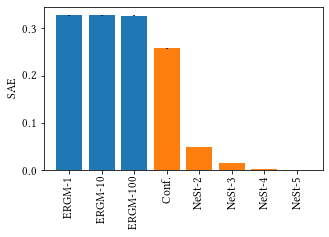

In [23]:
def plot_stuff(key_vals, ax, label):
    for keys, vals in key_vals:
        ax.bar(keys, list(map(np.mean, vals.values())), yerr=list(map(np.std, vals.values())))
    ax.set_ylabel(label)
    #ax.set_xticklabels(rotation=90)
    #if label=="rewiring_time":
    ax.tick_params(axis='x', labelrotation = 90)
#plt.figure(figsize=(4, 3))
plot_stuff([(keys1, SAE1), (keys2, SAE2)], plt.gca(), "SAE")
#plt.savefig(f"./results/SAE_{datetime.now().strftime('%m_%d')}.pdf")

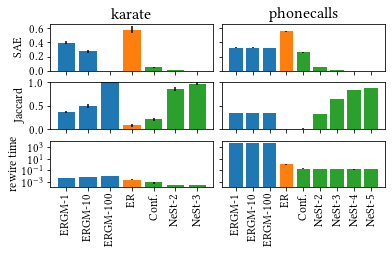

In [24]:
fig, axs = plt.subplots(3,2,figsize=(6, 3), sharex='col', sharey='row')


# SAE
plot_stuff([(keys3, SAE3), (keys5, SAE5), (keys4, SAE4)], axs[0,0], "SAE")
plot_stuff([(keys1, SAE1), (keys6, SAE6), (keys2, SAE2)], axs[0,1], "")

axs[0,0].set_yticks([0, 0.2, 0.4, 0.6])


# Jaccard
plot_stuff([(keys3, J3), (keys5, J5), (keys4, J4)], axs[1,0], "Jaccard")
plot_stuff([(keys1, J1), (keys6, J6), (keys2, J2)], axs[1,1], "")

axs[1,0].set_ylim(0,1)
axs[1,0].set_yticks([0, 0.5, 1])


# SAE
plot_stuff([(keys3, rew_time3), (keys5, rew_time5), (keys4, rew_time4)], axs[2,0], "rewire time")
plot_stuff([(keys1, rew_time1), (keys6, rew_time6), (keys2, rew_time2)], axs[2,1], "")
axs[2,1].set_yscale("log")

plt.subplots_adjust(wspace=0.05, hspace=0.25)

axs[2,0].set_yticks([0.001, 0.1, 10, 10**3])

axs[0,0].set_title("karate", fontsize=16)
axs[0,1].set_title("phonecalls", fontsize=16)

fig.savefig("./results/ergm_nest.pdf", bbox_inches="tight", pad_inches=0.1)

In [25]:
np.std(rew_time5[0])

0.000363594462150063

In [26]:
np.max(rew_time5[0])

0.0037341500000138694